This can be used to take a model, with parameters copied from the UpdatedScoresNewFeatures after using Hyperopt (for 40 and 200 iterations). Theres also another set of parameters. Use the other set to regenerate presentation plot. 

In [66]:
import numpy as np
import sklearn
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from matplotlib import rc
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
from matplotlib.ticker import MaxNLocator
import scipy.signal
import xgboost as xgb
from xgboost.sklearn import XGBClassifier


In [103]:
#params taken form UpdatseScore notebook after tuning
#first 40 iterations
best = {'x_pos_weight': 5.432757477557094, 'x_learning_rate': 0.18583963071918821,
        'x_max_depth': 19, 'x_min_child': 5.0, 'x_tree_colsample': 0.8203255474481522, 
        'x_subsample': 0.9240900737077349}


#after a total of 200 iterations
best = {'x_pos_weight': 6.606175001822464, 'x_learning_rate': 0.16789058169707416, 
         'x_max_depth': 13, 'x_min_child': 7.0, 'x_tree_colsample': 0.7158073319959313,
         'x_subsample': 0.9872987553651339}


xgbc = XGBClassifier(n_estimators=100, scale_pos_weight=best2["x_pos_weight"], seed = 0, 
                    learning_rate = best2["x_learning_rate"], max_depth = best2["x_max_depth"], 
                     min_child_weight = best2["x_min_child"], colsample_bytree= best2["x_tree_colsample"],
                     subsample = best2["x_subsample"]
                    ) 


#params used for plot in presentation
xgbc = XGBClassifier(n_estimators=100, scale_pos_weight=10, seed = 0, 
                    learning_rate = 0.05, max_depth = 10, 
                     min_child_weight = 3, colsample_bytree= 0.8,
                     subsample = 0.95
                    ) 

params = xgbc.get_xgb_params()

In [97]:
data_order2 = np.loadtxt("../csvs/BetaFeats/Order.txt", dtype= str)
#print data_order
data_order = np.loadtxt("../csvs/NoLyapanovTime/Order.txt", dtype=str)
print data_order
print data_order2[1:]

['sifOrbs=100000.0Nout=100window=10.csv'
 'sifOrbs=10000.0Nout=100window=10.csv'
 'sifOrbs=100.0Nout=100window=10.csv' 'sifOrbs=10.0Nout=100window=10.csv'
 'sifOrbs=32000.0Nout=100window=10.csv'
 'sifOrbs=3200.0Nout=100window=10.csv']
['sifOrbsMore=1000.0Nout=100window=10.csv'
 'sifOrbsMore=100.0Nout=100window=10.csv'
 'sifOrbsMore=10.0Nout=100window=10.csv'
 'sifOrbsMore=32000.0Nout=100window=10.csv'
 'sifOrbsMore=3200.0Nout=100window=10.csv'
 'sifOrbsMore=320.0Nout=100window=10.csv'
 'sifOrbsMore=32.0Nout=100window=10.csv']


In [98]:
features = []
features += ['avg_iH1', 'avg_iH2']
features += ['norm_std_a1', 'norm_max_a1', 'norm_std_window10_a1', 'norm_max_window10_a1']
features += ['norm_std_a2', 'norm_max_a2', 'norm_std_window10_a2', 'norm_max_window10_a2']
features += ['norm_std_a3', 'norm_max_a3', 'norm_std_window10_a3', 'norm_max_window10_a3']
features += ['avg_ecross1', 'std_ecross1', 'max_ecross1', 'min_ecross1']
features += ['avg_ecross2', 'std_ecross2', 'max_ecross2', 'min_ecross2']
features += ['avg_ecross3', 'std_ecross3', 'max_ecross3', 'min_ecross3']
features += ['norm_a1_slope', 'norm_a2_slope', 'norm_a3_slope']

features2  = features[:]+ ['avg_beta12','std_beta12','min_beta12','max_beta12','avg_beta23','std_beta23','min_beta23','max_beta23'] 


In [99]:
import time
#without beta feats


#with beta feats
long_walltime = np.zeros(len(data_order2)) # time for just lyafeat
long_score = np.zeros_like(long_walltime)#avg time for the rest of feats
long_orbits = np.zeros_like(long_walltime)
#cv_score
#total_length = max(len(data_order), len(data_order2))


for i in range(len(data_order2)):
    long_orbits[i] = float(data_order2[i].split("=")[1].split(".")[0])
    data = pd.read_csv("../csvs/BetaFeats/"+data_order2[i], index_col =0)
    X = data[features2]
    Y = data["Stable"]
    trainX, testX, trainY, testY= sklearn.model_selection.train_test_split(X, Y, test_size = 0.2, random_state = 0, stratify = Y)

    long_walltime[i] = np.average(data["wall_time"])
    dtrain = xgb.DMatrix(trainX, trainY)
    dtest = xgb.DMatrix(testX)
    start = time.time()
    #score = xgb.cv(params, dtrain, nfold = 5, metrics = "auc")
    bst = xgb.train(params, dtrain)
    end = time.time()
    print "time:", end - start
    preds = bst.predict(dtest)
    long_score[i] = metrics.average_precision_score(testY, preds)
    print long_score[i]
    print long_orbits

time: 0.185106992722
0.969605778749
[ 10000.      0.      0.      0.      0.      0.      0.      0.]
time: 0.196925163269
0.9652255807
[ 10000.   1000.      0.      0.      0.      0.      0.      0.]
time: 0.19228720665
0.961754672763
[ 10000.   1000.    100.      0.      0.      0.      0.      0.]
time: 0.182945966721
0.954569594233
[ 10000.   1000.    100.     10.      0.      0.      0.      0.]
time: 0.157865047455
0.974467913083
[  1.00000000e+04   1.00000000e+03   1.00000000e+02   1.00000000e+01
   3.20000000e+04   0.00000000e+00   0.00000000e+00   0.00000000e+00]
time: 0.169247150421
0.96744868529
[  1.00000000e+04   1.00000000e+03   1.00000000e+02   1.00000000e+01
   3.20000000e+04   3.20000000e+03   0.00000000e+00   0.00000000e+00]
time: 0.190459012985
0.962397086175
[  1.00000000e+04   1.00000000e+03   1.00000000e+02   1.00000000e+01
   3.20000000e+04   3.20000000e+03   3.20000000e+02   0.00000000e+00]
time: 0.180280923843
0.959509814866
[  1.00000000e+04   1.00000000e+03 

In [100]:
short_walltime = np.zeros(len(data_order))
short_score = np.zeros_like(short_walltime)
short_orbits = np.zeros_like(short_walltime)

for i in range(len(short_walltime)):
    short_orbits[i] = float(data_order[i].split("=")[1].split(".")[0])
    data = pd.read_csv("../csvs/NoLyapanovTime/"+data_order[i], index_col =0)
    X = data[features]
    Y = data["Stable"]
    trainX, testX, trainY, testY= sklearn.model_selection.train_test_split(X, Y, test_size = 0.2, random_state = 0, stratify = Y)

    short_walltime[i] = np.average(data["wall_time"])
    dtrain = xgb.DMatrix(trainX, trainY)
    dtest = xgb.DMatrix(testX)
    start = time.time()
    #score = xgb.cv(params, dtrain, nfold = 5, metrics = "auc")
    bst = xgb.train(params, dtrain)
    end = time.time()
    print "time:", end - start
    preds = bst.predict(dtest)
    short_score[i] = metrics.average_precision_score(testY, preds)
    print short_score[i]
    print short_orbits

time: 0.202546834946
0.97211359353
[ 100000.       0.       0.       0.       0.       0.]
time: 0.179147958755
0.962803916365
[ 100000.   10000.       0.       0.       0.       0.]
time: 0.181427001953
0.95281593142
[ 100000.   10000.     100.       0.       0.       0.]
time: 1.80860900879
0.942500689837
[  1.00000000e+05   1.00000000e+04   1.00000000e+02   1.00000000e+01
   0.00000000e+00   0.00000000e+00]
time: 7.11826992035
0.967404409923
[  1.00000000e+05   1.00000000e+04   1.00000000e+02   1.00000000e+01
   3.20000000e+04   0.00000000e+00]
time: 0.176981925964
0.892449832648
[  1.00000000e+05   1.00000000e+04   1.00000000e+02   1.00000000e+01
   3.20000000e+04   3.20000000e+03]


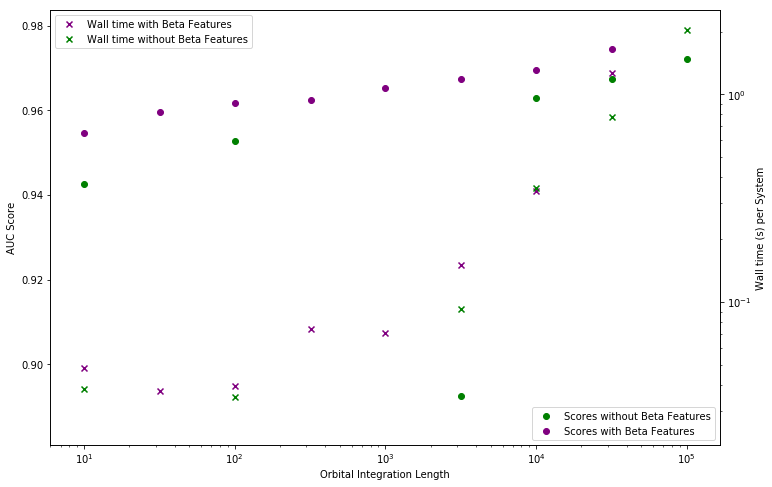

In [101]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot("111")
ax.scatter(short_orbits, short_score, color  = "green", label= "Scores without Beta Features")
ax.scatter(long_orbits, long_score, color  = "purple", label= "Scores with Beta Features")

ax.legend(loc = 4)
ax.set_xscale("log")
ax2 = ax.twinx()
ax2.scatter(long_orbits, long_walltime, color = "purple",marker = "x", label= "Wall time with Beta Features")
ax2.scatter(short_orbits, short_walltime, color = "green",marker = "x", label= "Wall time without Beta Features")
ax2.legend(loc = 2)
ax.set_xlabel("Orbital Integration Length")
ax.set_ylabel("AUC Score")
ax2.set_ylabel("Wall time (s) per System")
ax2.set_yscale("log")
fig.show()


In [102]:
#import pickle
#pickle.dump(bst ,open("Testing/XGBmodel_SepFile.pkl", 'wb'))
